In [23]:
import numpy as np
def ptrans(f,t):
    H,W = f.shape
    rr,cc = t
    row,col = np.indices(f.shape)
    g = f[(row-rr)%H, (col-cc)%W]
    return g

In [24]:
import numpy as np
def ptransfat(f,t):
    #função implementada
    H,W = f.shape
    r,c = t
    r = r%H
    c = c%W
    r = (np.rint(r)).astype(int)
    c = (np.rint(c)).astype(int)
    
    
    g = np.zeros_like(f)
    
    g[r:,c:] = f[:H-r,:W-c]
    g[:r,c:] = f[H-r:,:W-c]
    g[r:,:c] = f[:H-r,W-c:]
    g[:r,:c] = f[H-r:,W-c:]
    
    return g

In [4]:
testing = (__name__ == '__main__')

if testing:
    ! jupyter nbconvert --to 'python' ptrans
    import sys,os
    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_6/')
    if path not in sys.path:
        sys.path.append(path)
    import ptrans as ptr

[NbConvertApp] Converting notebook ptrans.ipynb to python
[NbConvertApp] Writing 2965 bytes to ptrans.py


## Examples

### Example 1

#### Caso numérico

In [15]:
if testing:
    f = np.arange(25).reshape(5,5)
    
    t1 = (2,0)
    t2 = (0, 100003)
    t3 = (-577, 333)
    
    g1 = ptr.ptransfat(f,t1)
    g2 = ptr.ptransfat(f,t2)
    g3 = ptr.ptransfat(f,t2)
    
    print("Imagem original:\n",f)
    
    print("\nTranlação de (2,0):\n", g1)
    
    print("\nTranslação de (0,100003):\n", g2)
    
    print("\nTranslação de (-577,333):\n", g3)
   

Imagem original:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

Tranlação de (2,0):
 [[15 16 17 18 19]
 [20 21 22 23 24]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Translação de (0,100003):
 [[ 2  3  4  0  1]
 [ 7  8  9  5  6]
 [12 13 14 10 11]
 [17 18 19 15 16]
 [22 23 24 20 21]]

Translação de (-577,333):
 [[ 2  3  4  0  1]
 [ 7  8  9  5  6]
 [12 13 14 10 11]
 [17 18 19 15 16]
 [22 23 24 20 21]]


### Example 2

#### testes com imagens

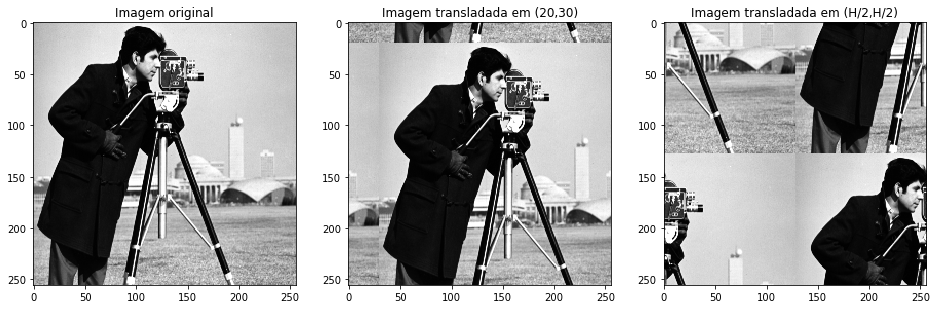

In [25]:
if testing:
    
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    H,W = f.shape
    t1 = (20.5,30.5)
    t2 = (H/2, W/2)
    
    g1 = ptransfat(f,t1)
    g2 = ptransfat(f,t2)
    
    plt.figure(1,figsize=[16,16])
    plt.subplot(131)
    plt.imshow(f,cmap="gray")
    plt.title('Imagem original')
    plt.subplot(132)
    plt.imshow(g1,cmap="gray")
    plt.title('Imagem transladada em (20,30)')
    plt.subplot(133)
    plt.imshow(g2,cmap="gray")
    plt.title('Imagem transladada em (H/2,W/2)')
    

### Example 3

#### Comparação entre os métodos ptrans e ptransfat

In [26]:
if testing:
    f = np.arange(16).reshape(4,4)
    f1 = np.arange(5*20).reshape(5,20)
    f2 = np.arange(100*200).reshape(100,200)
    f3 = np.arange(1080*720).reshape(1080,720)

    t1 = (2,0)
    t2 = (0, 100000)
    t3 = (-577, 333)

    print("----ptrans para 100px----:\n")
    %timeit ptr.ptrans(f1,t1)
    print("\n----ptransfat para 100px----:\n")
    %timeit ptr.ptransfat(f1,t1)

    print("\n----ptrans para 20000px ----:\n")
    %timeit ptr.ptrans(f2,t2)
    print("\n----ptransfat para 20000px----:\n")
    %timeit ptr.ptransfat(f2,t2)

    print("\n----trans para 777600px----:\n")
    %timeit ptr.ptrans(f3,t3)
    print("\n----transfat para 777600px----:\n")
    %timeit ptr.ptransfat(f3,t3)

----ptrans para 100px----:

The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 49.6 µs per loop

----ptransfat para 100px----:

The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.14 µs per loop

----ptrans para 20000px ----:

1000 loops, best of 3: 744 µs per loop

----ptransfat para 20000px----:

10000 loops, best of 3: 63.1 µs per loop

----trans para 777600px----:

10 loops, best of 3: 34.2 ms per loop

----transfat para 777600px----:

100 loops, best of 3: 3.5 ms per loop
